# Breast Cancer using logistic regression

## Library and Data Import

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('Libraries have been imported! :)')

Libraries have been imported! :)


In [5]:
train = pd.read_csv(r'E:\Semester-2\Noopa Prof\feb 18\Lab1_Git_Analysis\breastcancer.csv')

In [6]:
print(f'Preview:\n\n{train.head()}')

Preview:

           id                     name  radius  texture  perimeter    area  \
0    ID842302           Glynnis Munson     NaN    10.38     122.80  1001.0   
1    ID842517              Lana Behrer   20.57    17.77     132.90  1326.0   
2  ID84300903  Devondra Vanvalkenburgh   19.69    21.25     130.00  1203.0   
3  ID84348301          Glory Maravalle     NaN    20.38      77.58   386.1   
4  ID84358402           Mellie Mccurdy   20.29    14.34     135.10  1297.0   

   smoothness  compactness  concavity  symmetry  fractal_dimension  age  \
0     0.11840      0.27760     0.3001    0.2419            0.07871   35   
1     0.08474      0.07864     0.0869    0.1812            0.05667   27   
2     0.10960      0.15990     0.1974    0.2069            0.05999   31   
3     0.14250      0.28390     0.2414    0.2597            0.09744   49   
4     0.10030      0.13280     0.1980    0.1809            0.05883   20   

   diagnosis  
0          1  
1          1  
2          1  
3         

## Exploratory Data Analysis through Visualizations

### Visualization #1: Heat Map

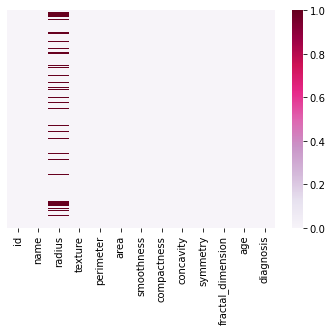

In [7]:
# simple heat map showing where we are missing data

heat_map = sns.heatmap(train.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)

plt.show()

*Looks like we aren't missing too much data in radius - might need to insert dummy data*

### Visualization #2: Count Plot

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

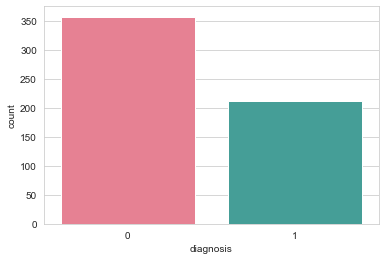

In [8]:
# a countplot shows the counts of observations in each categorical bin using bars
# think of it as a histogram across a categorical, instead of quantitative, variable

sns.set_style("whitegrid")
sns.countplot(data = train, x = 'diagnosis', palette = 'husl')

C:\Users\Vaibhavi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

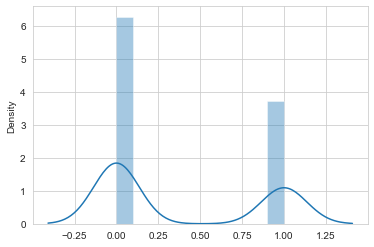

In [13]:
sns.distplot(x = train['diagnosis'], bins = 10)


### Visualization #3: Histogram

<AxesSubplot:ylabel='Frequency'>

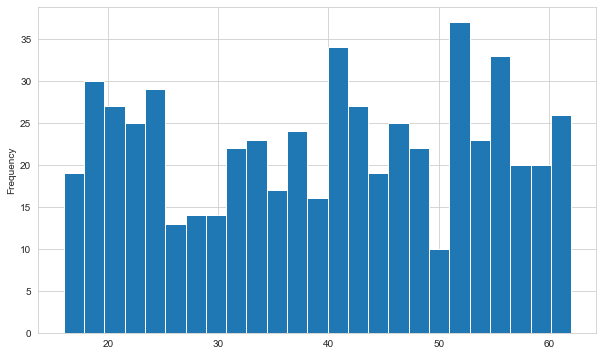

In [7]:
# let's check out the spread of ages using a histogram

train['age'].plot.hist(bins = 25, figsize = (10,6))

## Data Cleaning

The missing radius data needs to be filled in (not just dropped) by filling in the mean radius. Let's check the average radius by diagnosis.

<AxesSubplot:xlabel='diagnosis', ylabel='radius'>

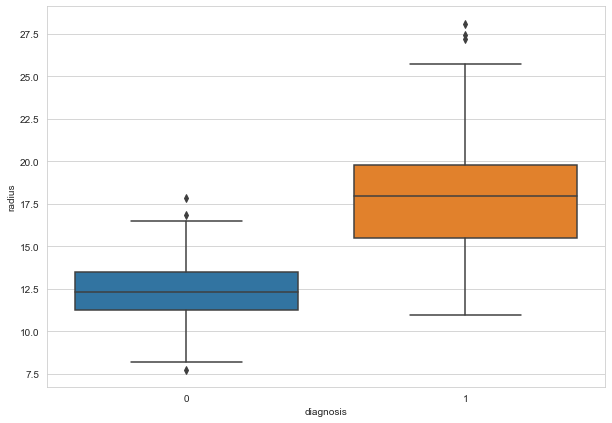

In [8]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "diagnosis", y = "radius", data = train)

Women who were diagnosed with breast cancer (diagnosis = 1) tend to have a higher tumor radius size (the distance from the center to the circumference of the tumor).

In [9]:
# calculate the average radius size by diagnosis (0 or 1)

train.groupby('diagnosis')["radius"].mean()

diagnosis
0    12.340825
1    17.896629
Name: radius, dtype: float64

In [10]:
# create a function that imputes average radius into missing values

def impute_radius(cols):
    radius = cols[0]
    diagnosis = cols[1]
    
    # if value in radius column is null
    if pd.isnull(radius):
        
        # if woman is diagnosed with breast cancer
        if diagnosis == 1:
            return 17
        # if woman was not diagnosed with breast cancer
        else:
            return 12
    # when value in radius column is not null
    else:
        # return that same value
        return radius

In [11]:
train['radius'] = train[['radius', 'diagnosis']].apply(impute_radius, axis = 1)

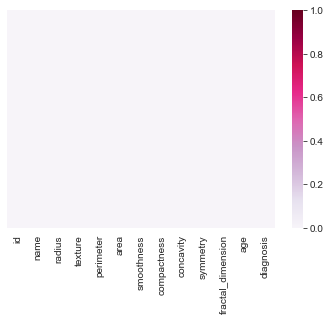

In [12]:
# check the heat map again after applying the above function

heat_map = sns.heatmap(train.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)

plt.show()

All rows that were missing data have now been imputed with the average radius size which was determined by whether or not the woman was diagnosed with breast cancer. No need to drop columns or impute more missing values.

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    object 
 1   name               569 non-null    object 
 2   radius             569 non-null    float64
 3   texture            569 non-null    float64
 4   perimeter          569 non-null    float64
 5   area               569 non-null    float64
 6   smoothness         569 non-null    float64
 7   compactness        569 non-null    float64
 8   concavity          569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
 11  age                569 non-null    int64  
 12  diagnosis          569 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


In [14]:
# dropping categorical variables

train.drop(['id', 'name'], axis = 1, inplace = True)

In [15]:
train.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,17.00,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,17.00,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


## Building the Model

#### Step 1: Split training data into X and y

In [16]:
X = train.drop('diagnosis', axis = 1)
y = train['diagnosis']

In [17]:
X.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age
0,17.00,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31
3,17.00,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

#### Step 2: Train test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

#### Step 3: Training and Predicting

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logreg = LogisticRegression()

In [22]:
logreg.fit(X_train, y_train)

C:\Users\Vaibhavi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
predictions = logreg.predict(X_test)

## Evaluations

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       105
           1       0.89      0.85      0.87        66

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train, y_train)
accuracy_score(y_test,predictions)

C:\Users\Vaibhavi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9005847953216374